In [ ]:
from google.colab import files
uploaded = files.upload()


Saving DATASETFINAL2.xlsx to DATASETFINAL2 (2).xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Supongamos que el archivo se llama "DATASETFINAL.xlsx"
df = pd.read_excel("DATASETFINAL2.xlsx")

In [ ]:
# Concatenar las dos columnas y guardar el resultado en una nueva columna
df['Fecha'] = df['Fecha.1'].astype(str) + df['Fecha.2'].astype(str) + df['Hora'].astype(str)
df = df.drop('Fecha.1', axis=1)
df = df.drop('Fecha.2', axis=1)
df = df.drop('Hora', axis=1)

# Mostrar el DataFrame resultante
print(df)

      O3  SO2  NO  CO  PM10 Calidad   CalidadF   Fecha
0      9   18  18  12    80    BUENA         1     111
1      5   15  17  13    86    BUENA         1     112
2      6   12  16  13    94    BUENA         1     113
3      3    9  17  13   100    BUENA         1     114
4      3    8  16  13   103    BUENA         1     115
...   ..  ...  ..  ..   ...      ...       ...     ...
8755  29    8  33   6   100     MALA         0  311220
8756  14    7  26   7   101     MALA         0  311221
8757  11    7  30   8   103     MALA         0  311222
8758  15    7  25  10   104     MALA         0  311223
8759  20    7  18  11   105     MALA         0  311224

[8760 rows x 8 columns]


In [ ]:
df_con_valores_reemplazados = df.copy()  # Copia el DataFrame original
nuevo_valor = 0

columna_a_actualizar = "SO2"
df_con_valores_reemplazados[columna_a_actualizar].fillna(nuevo_valor, inplace=True)

columna_a_actualizar = "NO"
df_con_valores_reemplazados[columna_a_actualizar].fillna(nuevo_valor, inplace=True)

columna_a_actualizar = "CO"
df_con_valores_reemplazados[columna_a_actualizar].fillna(nuevo_valor, inplace=True)

columna_a_actualizar = "PM10"
df_con_valores_reemplazados[columna_a_actualizar].fillna(nuevo_valor, inplace=True)

columna_a_actualizar = "O3"
df_con_valores_reemplazados[columna_a_actualizar].fillna(nuevo_valor, inplace=True)

columna_a_actualizar = "Fecha"
df_con_valores_reemplazados[columna_a_actualizar].fillna(nuevo_valor, inplace=True)

# Verifica si hay valores NaN en el DataFrame y cualquier valor True indica presencia de NaN en esa columna
valores_nulos_por_columna = df_con_valores_reemplazados.isna().any()

# Imprime los resultados
print("Valores nulos por columna:")
print(valores_nulos_por_columna)

In [ ]:
# Visualizar las primeras filas de tus datos
print(df.head())

   O3  SO2  NO  CO  PM10 Calidad   CalidadF Fecha
0   9   18  18  12    80    BUENA         1   111
1   5   15  17  13    86    BUENA         1   112
2   6   12  16  13    94    BUENA         1   113
3   3    9  17  13   100    BUENA         1   114
4   3    8  16  13   103    BUENA         1   115


In [ ]:
# Información general sobre tus datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   O3        8760 non-null   int64 
 1   SO2       8760 non-null   int64 
 2   NO        8760 non-null   int64 
 3   CO        8760 non-null   int64 
 4   PM10      8760 non-null   int64 
 5   Calidad   8760 non-null   object
 6   CalidadF  8760 non-null   int64 
 7   Fecha     8760 non-null   object
dtypes: int64(6), object(2)
memory usage: 547.6+ KB
None


In [ ]:
# Estadísticas descriptivas de tus datos
print(df.describe())

                O3          SO2           NO           CO         PM10  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean     26.943950     7.883904    16.450571     6.596005    73.145890   
std      25.920486     7.468019     8.175958     3.486265    25.499552   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       9.000000     3.000000    11.000000     5.000000    51.000000   
50%      19.000000     5.000000    15.000000     6.000000    71.000000   
75%      36.000000    10.000000    21.000000     8.000000    99.000000   
max     157.000000    69.000000    61.000000    25.000000   130.000000   

          CalidadF  
count  8760.000000  
mean      0.252169  
std       0.434283  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


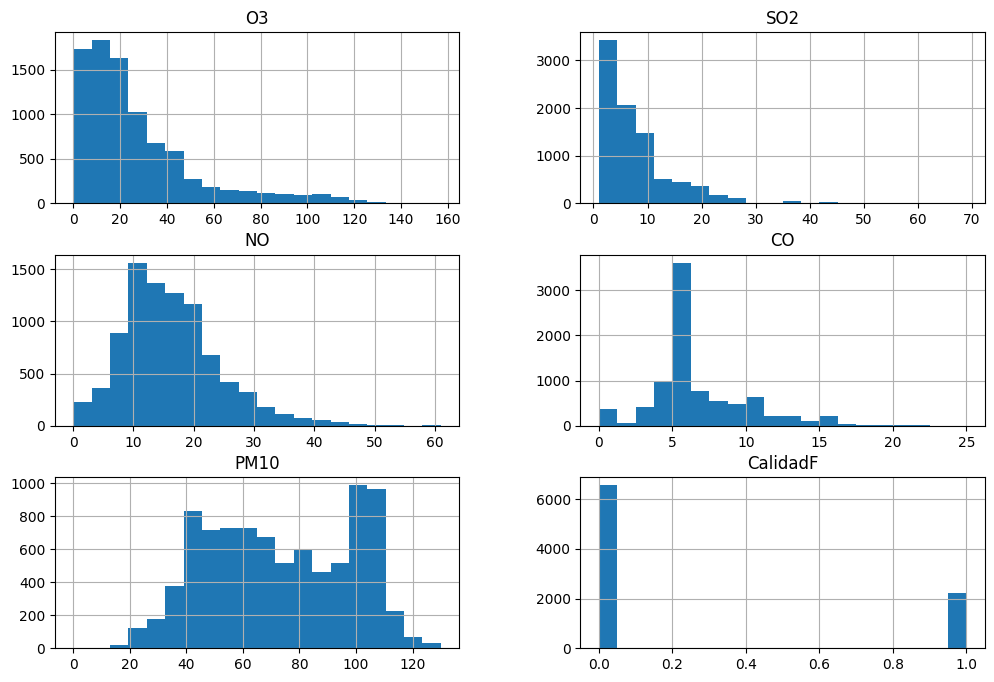

In [ ]:
# Visualización de histogramas para cada columna numérica
df.hist(bins=20, figsize=(12, 8))
plt.show()

<ipython-input-13-31a76b552960>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


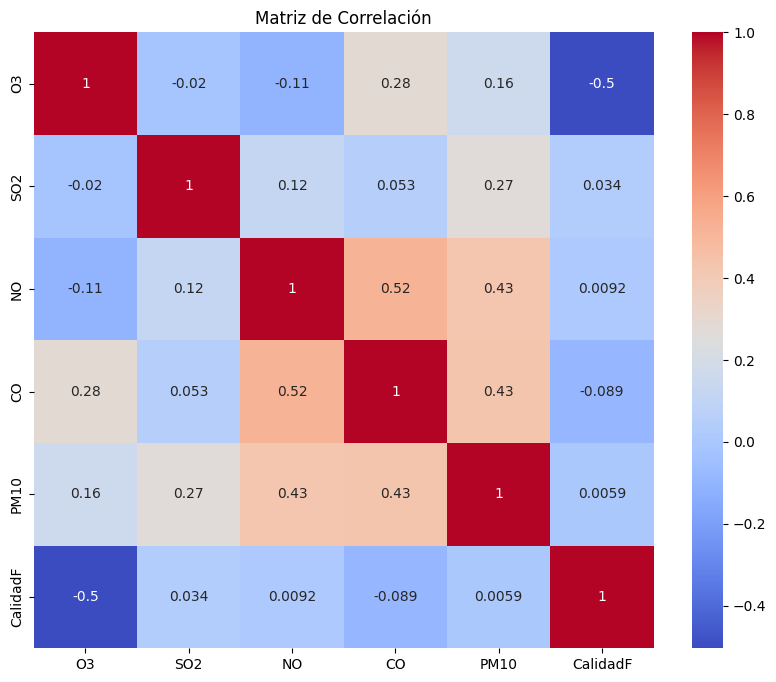

In [ ]:
# Matriz de correlación y mapa de calor
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

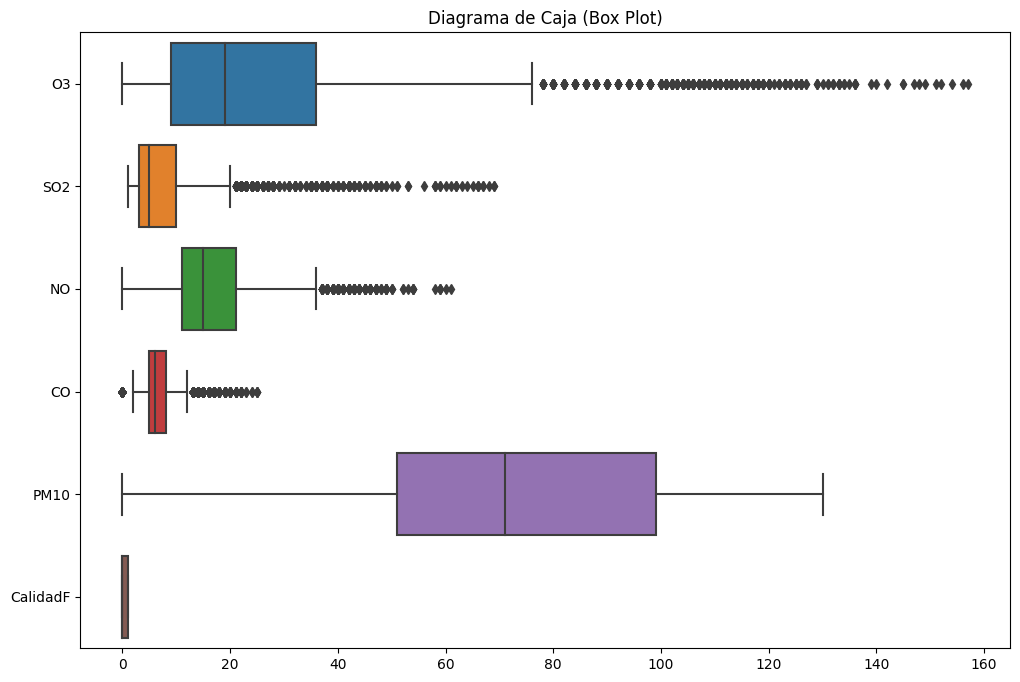

In [ ]:
# Box plot para cada columna numérica
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h")
plt.title("Diagrama de Caja (Box Plot)")
plt.show()

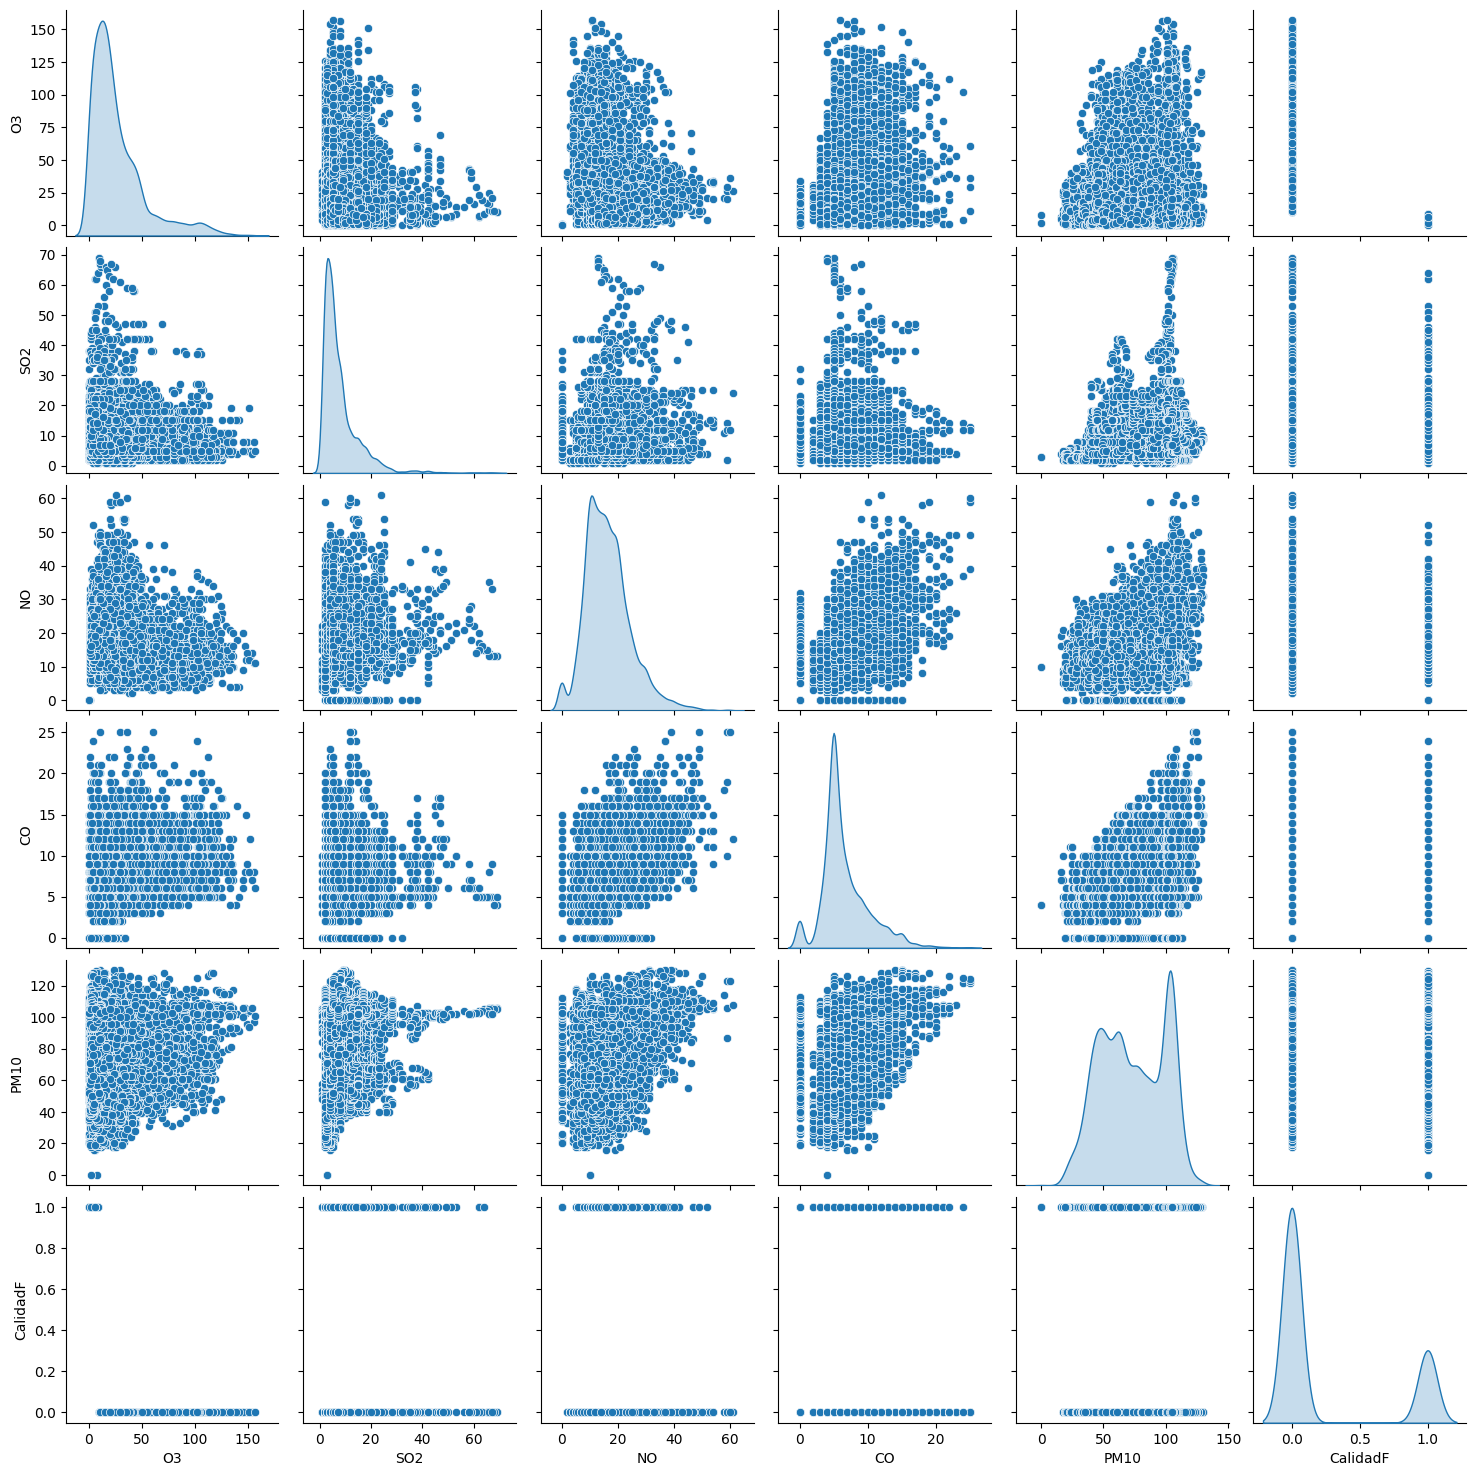

In [ ]:
# Visualizar relaciones entre pares de columnas numéricas
sns.pairplot(data=df, diag_kind="kde")
plt.show()

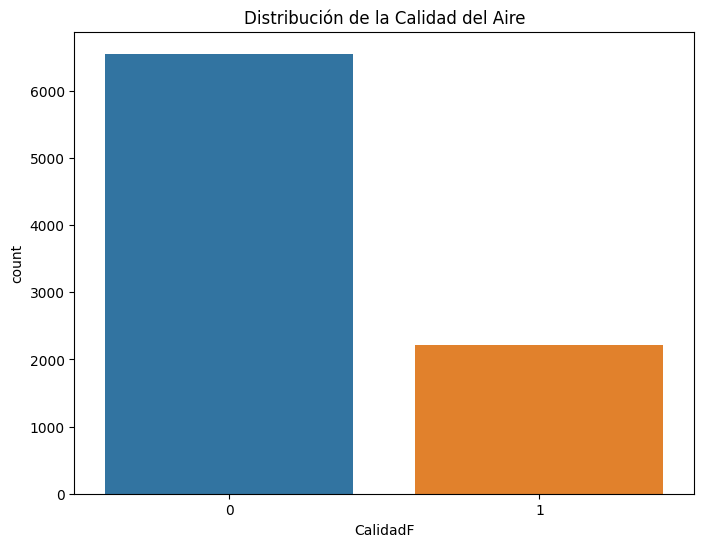

In [ ]:
# Gráfico de barras para la variable categórica "Calidad del aire"
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="CalidadF")
plt.title("Distribución de la Calidad del Aire")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar los datos
data = df_con_valores_reemplazados  # Asegúrate de cambiar el nombre del archivo a tu conjunto de datos

# Separar las características (X) y la variable objetivo (y)
X = data[['SO2', 'NO', 'CO', 'PM10', 'O3', 'Fecha']]
y = data['CalidadF']

# Divide los datos en entrenamiento (60%), validación (20%) y prueba (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Crea un modelo SVM con un kernel lineal
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_valid_pred = svm_model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print(f"Precisión en el conjunto de validación: {accuracy_valid:.2f}")

# Realiza predicciones en el conjunto de prueba
y_test_pred = svm_model.predict(X_test)

# Evalúa el rendimiento en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Precisión en el conjunto de prueba: {accuracy_test:.2f}")

# Realiza la validación cruzada con 50 pliegues (folds)
scores = cross_val_score(svm_model, X_train, y_train, cv=50)

# Imprime las puntuaciones de cada pliegue
print("Puntuaciones de validación cruzada:", scores)

# Calcula y muestra la puntuación promedio de la validación cruzada
mean_score = np.mean(scores)
print("Puntuación promedio de validación cruzada:", mean_score)


Precisión en el conjunto de validación: 0.98
Precisión en el conjunto de prueba: 0.97
